In [1]:
#importing all libraries
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
lst_fire_img = glob.glob('C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/fire_images/*.png')
lst_non_fire_img = glob.glob('C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images/*.png')

In [3]:
lst_non_fire_img

['C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.1.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.10.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.100.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.101.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.102.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.103.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.104.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.105.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.106.png',
 'C:/Users/Muhammad Kashif/OneDrive/Documents/FIRE/fire_dataset/non_fire_images\\non_fire.107.png',
 'C

In [4]:
#merging the two datasets
fire_list = []
nonfire_list = []
for x in lst_fire_img:
  fire_list.append([x,"Fire"])
for x in lst_non_fire_img:
  nonfire_list.append([x,"No_fire"])

dataset = fire_list+nonfire_list 

In [5]:
#Creating a Dataframe
df = pd.DataFrame(dataset,columns = ['image','label'])
print(df.head(2))

                                               image label
0  C:/Users/Muhammad Kashif/OneDrive/Documents/FI...  Fire
1  C:/Users/Muhammad Kashif/OneDrive/Documents/FI...  Fire


In [6]:
#print(df.shape)

df = df.sample(frac=1).reset_index(drop=True)
df.head()


,image,label
0,C:/Users/Muhammad Kashif/OneDrive/Documents/FI...,Fire
1,C:/Users/Muhammad Kashif/OneDrive/Documents/FI...,Fire
2,C:/Users/Muhammad Kashif/OneDrive/Documents/FI...,No_fire
3,C:/Users/Muhammad Kashif/OneDrive/Documents/FI...,Fire
4,C:/Users/Muhammad Kashif/OneDrive/Documents/FI...,Fire


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

Test_Generator = ImageDataGenerator(rescale=1./255)

from sklearn.model_selection import train_test_split
Train_Data,Test_Data = train_test_split(df,test_size=0.2,random_state=42,shuffle=True)

print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)


TRAIN SHAPE:  (799, 2)
TEST SHAPE:  (200, 2)


In [8]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="image",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="image",
                                                   y_col="label",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="image",
                                                 y_col="label",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 720 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [9]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)
DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)
DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [10]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Fire': 0, 'No_fire': 1}
[0, 0, 0, 1, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'Fire': 0, 'No_fire': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'Fire': 0, 'No_fire': 1}
[0, 0, 0, 0, 0]
(256, 256, 3)


Epoch 1/20
23/23 [==============================] - 37s 2s/step - loss: 0.5256 - accuracy: 0.7389 - val_loss: 0.3228 - val_accuracy: 0.8228
Epoch 2/20
23/23 [==============================] - 25s 1s/step - loss: 0.3947 - accuracy: 0.8069 - val_loss: 0.2405 - val_accuracy: 0.9241
Epoch 3/20
23/23 [==============================] - 25s 1s/step - loss: 0.3044 - accuracy: 0.8778 - val_loss: 0.1807 - val_accuracy: 0.9241
Epoch 4/20
23/23 [==============================] - 25s 1s/step - loss: 0.2734 - accuracy: 0.8903 - val_loss: 0.1826 - val_accuracy: 0.9114
Epoch 5/20
23/23 [==============================] - 25s 1s/step - loss: 0.2638 - accuracy: 0.8903 - val_loss: 0.1471 - val_accuracy: 0.9620
Epoch 6/20
23/23 [==============================] - 26s 1s/step - loss: 0.2303 - accuracy: 0.9167 - val_loss: 0.1614 - val_accuracy: 0.9620
Epoch 7/20
23/23 [==============================] - 25s 1s/step - loss: 0.2097 - accuracy: 0.9194 - val_loss: 0.1214 - val_accuracy: 0.9620
Epoch 8/20
23/23 [==

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


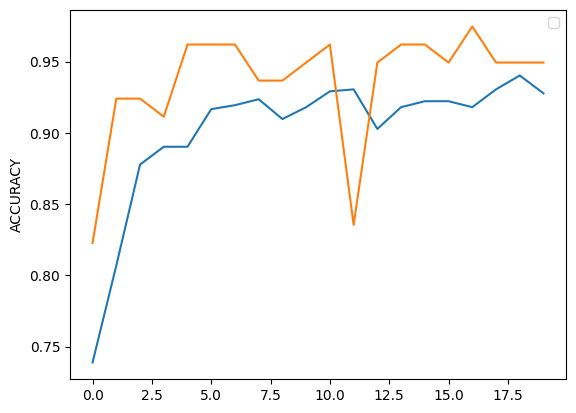

In [11]:
Model_Two = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(256,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")
Model_Two.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
ANN_Model = Model_Two.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=Call_Back,
                      epochs=20)

plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [12]:
Prediction_Two = Model_Two.predict(Test_IMG_Set)
Prediction_Two = Prediction_Two.argmax(axis=-1)
print(Prediction_Two)

7/7 [==============================] - 5s 738ms/step
[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
import tkinter as tk
root= tk.Tk()

In [14]:
canvas1 = tk.Canvas(root, width = 1000, height = 1000)
canvas1.pack()

In [15]:
label1 = tk.Label(root, text='Fire Detection System', font=("Courier",40),bg='black',fg='white')
canvas1.create_window(450, 50, window=label1)

1

In [16]:
from PIL import ImageTk, Image  
from tkinter import filedialog
import os
root.geometry("550x300+300+150")
root.resizable(width=True, height=True)
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
def upload_file():
    global img
    global filename
    global b2
    f_types = [('Jpg Files', '*.jpg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img=Image.open(filename)
    image2=img.resize((300,300),Image.ANTIALIAS)
    img = ImageTk.PhotoImage(image2)
    b2 =tk.Label(root,image=img) # using Button 
    canvas1.create_window(250, 380, window=b2)

In [18]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#from tensorflow.keras.models import load_model

In [19]:
def prediction():
    img = image.load_img(filename,target_size=(256,256))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0) 
    Diff_Pred = Model_Two.predict(x)
    Diff_Pred = Diff_Pred.argmax(axis=-1)
    print(Diff_Pred)
    if Diff_Pred == 0:
        print('fire')
        label3 = tk.Label(root, text='Fire', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label3)
    else:
        print('no fire')
        label4 = tk.Label(root, text='No Fire', font=("Courier",40),fg='red')
        canvas1.create_window(700, 600, window=label4)

In [20]:
btn1 = tk.Button(root, text='Upload Image/Video', command=upload_file, bg='orange',font=("Courier",20))
canvas1.create_window(620, 400, window=btn1)
btn2 = tk.Button(root, text='Detect', command=prediction, bg='green',font=("Courier",20))
canvas1.create_window(700, 200, window=btn2)


3

In [ ]:
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Muhammad Kashif\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Muhammad Kashif\AppData\Local\Temp\ipykernel_13240\461968420.py", line 8, in upload_file
    image2=img.resize((300,300),Image.ANTIALIAS)
AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'


1/1 [==============================] - 0s 75ms/step
[0]
fire
